# Q2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import time


## PART A


### Normalize data using MinMaxScaler

In [ ]:


# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

# Select 10,000 samples randomly
indices = np.random.choice(X.shape[0], 10000, replace=False)
X_sample = X.iloc[indices].values
y_sample = y.iloc[indices].values



# use MinMaxScaler
scaler = MinMaxScaler()
X_sample_scaled = scaler.fit_transform(X_sample)

In [ ]:
print("First 5 normalized samples (first 10 features each):")
print(X_sample_scaled[:5, :10])  # First 5 samples, first 10 features

First 5 normalized samples (first 10 features each):
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


min & max data aftwr minmaxscaler

In [ ]:
print("Min value:", X_sample_scaled.min())
print("Max value:", X_sample_scaled.max())

Min value: 0.0
Max value: 1.0


show some data

In [ ]:
print("Per-feature min (first 10):", X_sample_scaled.min(axis=0)[:10])
print("Per-feature max (first 10):", X_sample_scaled.max(axis=0)[:10])

Per-feature min (first 10): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Per-feature max (first 10): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]



### Normalize data using StandardScaler

In [ ]:


# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

# Select 10,000 samples randomly
indices = np.random.choice(X.shape[0], 10000, replace=False)
X_sample = X.iloc[indices].values
y_sample = y.iloc[indices].values
# Normalize data using StandardScaler
scaler = StandardScaler()
X_sample_scaled = scaler.fit_transform(X_sample)

# Alternatively, you could use MinMaxScaler
# scaler = MinMaxScaler()
# X_sample_scaled = scaler.fit_transform(X_sample)

show mean and std after Normalize data using StandardScaler

In [ ]:
print("Mean:", np.mean(X_sample_scaled))
print("Std deviation:", np.std(X_sample_scaled))

Mean: -2.698068525966605e-18
Std deviation: 0.9313146293146634


show some data

In [ ]:
print(X_sample_scaled[:5])  # Print first 5 samples after normalization

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## part B

### Split the normalized data into train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sample_scaled, y_sample, test_size=0.3, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 7000 samples
Test set size: 3000 samples


## PART C ( Train KNN model for at least 3 values)

### Train and evaluate KNN models with different k values(3,5,7)

In [ ]:
# Train and evaluate KNN models with different k values
k_values = [3, 5, 9]
accuracies = []

for k in k_values:
    # Train KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f"KNN with k={k}: Accuracy = {accuracy:.4f}")

# Find the best k value
best_k_index = np.argmax(accuracies)
best_k = k_values[best_k_index]
print(f"Best k value is {best_k} with accuracy {accuracies[best_k_index]:.4f}")

KNN with k=3: Accuracy = 0.9013
KNN with k=5: Accuracy = 0.9050
KNN with k=9: Accuracy = 0.8970
Best k value is 5 with accuracy 0.9050


# PART D

### Evaluate KNN with different k values ranging from 1 to 25

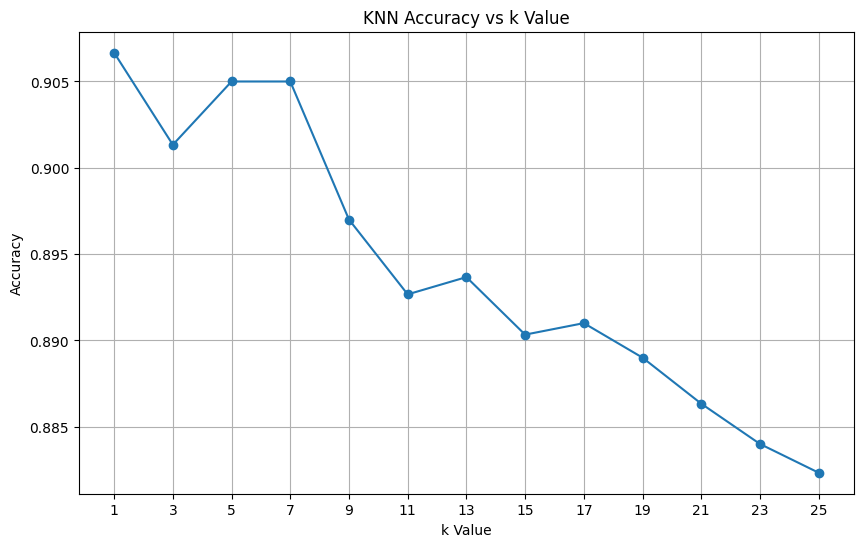

In [ ]:
# Evaluate KNN with different k values ranging from 1 to 25
k_range = range(1, 26, 2)  # Odd numbers from 1 to 25
accuracies_extended = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_extended.append(accuracy)

# Plot accuracy vs k
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracies_extended, marker='o', linestyle='-')
plt.title('KNN Accuracy vs k Value')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(k_range)
plt.show()

# part E

KNN with PCA (n_components=20): Accuracy = 0.9123
KNN with PCA (n_components=40): Accuracy = 0.9260
KNN with PCA (n_components=60): Accuracy = 0.9247
KNN with PCA (n_components=100): Accuracy = 0.9273


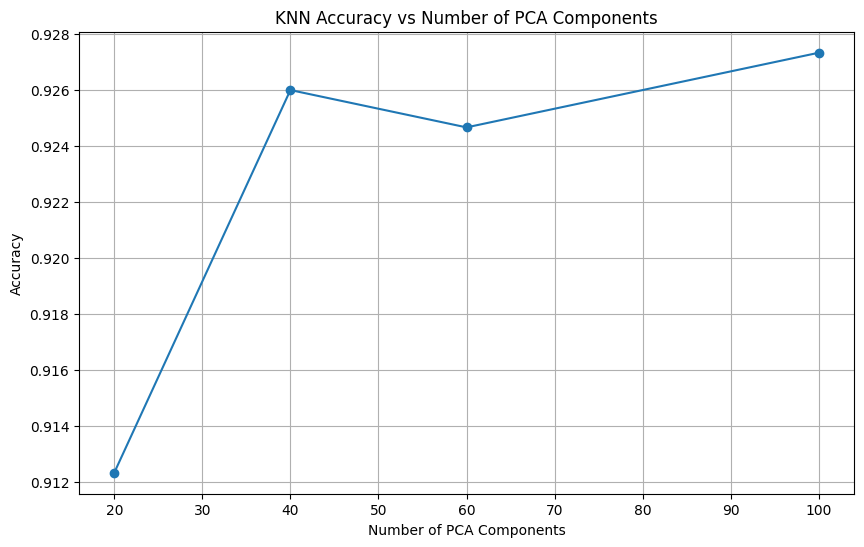

In [ ]:
# Apply PCA to reduce dimensions
pca_components = [20, 40, 60, 100]
pca_accuracies = []

for n_components in pca_components:
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train KNN with the best k value found earlier
    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_train_pca, y_train)

    # Evaluate
    y_pred = knn.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    pca_accuracies.append(accuracy)

    print(f"KNN with PCA (n_components={n_components}): Accuracy = {accuracy:.4f}")

# Plot accuracy vs number of PCA components
plt.figure(figsize=(10, 6))
plt.plot(pca_components, pca_accuracies, marker='o', linestyle='-')
plt.title('KNN Accuracy vs Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()